# MNIST with Naive Bayes and Logistic Regression

In this assignment, We use the MNIST database of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. Each image in both the training and test dataset is a 28x28 pixel image centered in using center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

The aim of the project is to train a Naive Bayes and logistic regression classifier using the training dataset and then recognize the handwritten digits/images of the test data. There are multiple ways of importing the MNIST dataset, here we have used the MNIST package available in python to load the train and test dataset along with the labels of the same.

#### Loading the MNIST dataset¶

In [1]:
#import and convert data to proper python dataset
import numpy as np
from mnist import MNIST
import time
import matplotlib.pyplot as py

# Using the MNIST package to import the mnist train dataset and labels.
mndata = MNIST('train_images')
images_train, labels_train = mndata.load_training()

# Converting the train dataset in LIST format to numpy matrix for computational ease
images_train = np.array(images_train, dtype=np.float32).reshape((60000,784))
labels_train = np.array(labels_train, dtype=np.int)

# Using the MNIST package to import the mnist test dataset and labels.
mndata1 = MNIST('test_images')
images_test, labels_test = mndata1.load_testing()

# Converting the test dataset in LIST format to numpy matrix for computational ease
images_test = np.array(images_test, dtype=np.float32).reshape((10000,784))
labels_test = np.array(labels_test, dtype=np.int)

#### Part 1 - Naive Bayes Classifier

Building a Naive Bayes classifier for the the MNIST data set and testing it on test dataset. Assuming that the probability model for each pixel is Gaussian and that the probability of each class—i.e., digit—is equal. That is, P(c = 0) = P(c = 1) = . . . = P(c = 9). Let x = (x1, x2, . . . , x784) be the vector of pixel values for a given image and c is the class or digit, 0 to 9. Hence,

                        P(c|x) = P(x|c)P(c)/P(x) ≈ product(P(xi|c)) for i = 1 -> 784 ............. (1)

,where P(xi |c) = N (µi , σi |c) is modeled as a Gaussian from the training data.

In [2]:
import math
c = []

# Slicing the input dataset by class
for eachClass in range(0,10,1):
    c.append(images_train[labels_train == eachClass])

# store the number of classes in the dataset   
numClasses = len(c)
c=np.array(c)

To build a naive bayes classifier whose conditional probabibility is modeled as a gaussian, We have to calculate the mean and standard deviations for each class as shown below, using which we compute the gaussian component.

Taking the logarithm of the equation (1), we get

                           ∑i=1784lnP(c|xi)=∑i=1784ln(P(x1|c).P(x2|c)....P(Xi|c))
 
Taking the logarithm of the gaussian function reveals the following and is divided as first term and second term in the code:

                           ln(P(xi|c))=−1∗ln(2πσ2−−−−√)−1∗((X−μ)2/2σ2)
 
The conditional probability of every first datapoint or image is displayed as an 28 X 28 image. We can see that the conditional probabilities start to depict averaged shape of the digits present in them.

After calculating the posterior probability, we get a 10000 X 10 having the posterior probability corresponding to each input datapoint. We then classify the test image by taking the class which provides maximum posterior probability i.e P(c|Xi)

Showing the first conditional probability of class 0


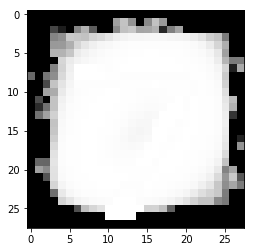

Showing the first conditional probability of class 1


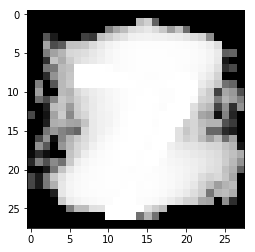

Showing the first conditional probability of class 2


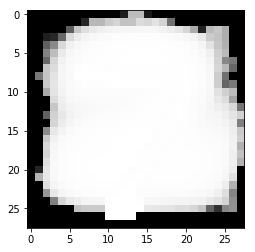

Showing the first conditional probability of class 3


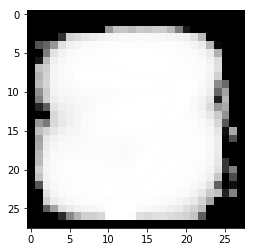

Showing the first conditional probability of class 4


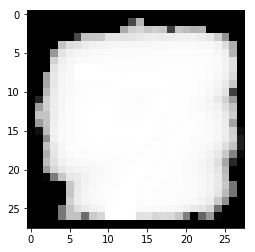

Showing the first conditional probability of class 5


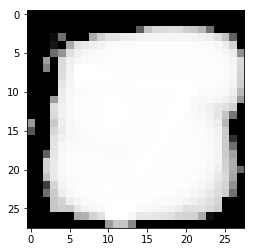

Showing the first conditional probability of class 6


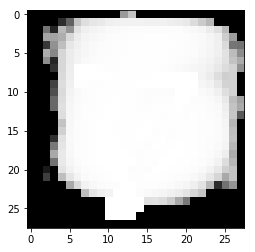

Showing the first conditional probability of class 7


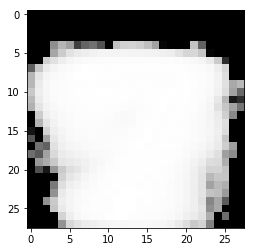

Showing the first conditional probability of class 8


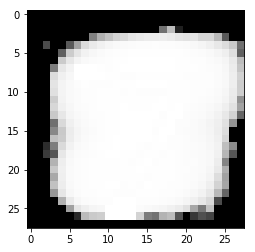

Showing the first conditional probability of class 9


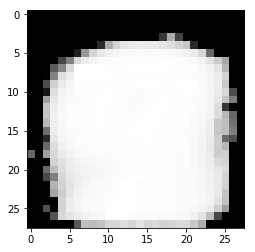

In [3]:
# Crete empty lists
meansByClass = []
stdsByClass = []
posteriorProb = []

# Calculate the mean and standard deviation of each class
for dataEachClass in c:
    meansByClass.append(np.average(dataEachClass,axis=0))
    stdsByClass.append(np.std(dataEachClass,axis=0)+1)    

# for each class calculate the posterior probabilities for the test dataset 
for i in range(0,numClasses,1):
    firstTerm = -1*((np.power(images_test-meansByClass[i],2))/(2*(stdsByClass[i]**2)))
    secondTerm = -1*(np.log(stdsByClass[i]*math.sqrt(2*math.pi)))
    out = firstTerm + secondTerm
    print("Showing the first conditional probability of class "+str(i))
    py.imshow(np.exp(out[0]).reshape((28,28)),cmap="binary")
    py.show()
    posteriorProb.append(np.sum(out,axis=1))

posteriorProb = np.array(posteriorProb).T

# get the maximum probability which represents the class to which an test images belongs to
classes = np.argmax(posteriorProb,axis=1)

In [4]:
import pandas as pd
import matplotlib.pyplot as py

# define the columns of the dataframe to display accuracy by digits
columns = ["Digit","Accuray"]
gh = []

# using the crosstab functionality of the pandas to create the confusion matrix of naive bayes classifer
actual = pd.Series(labels_test, name="Actual")
predicted = pd.Series(classes, name="predicted")
a = pd.crosstab(actual,predicted)
print("The confusion matrix of naive bayes classifier is as shown below:\n")
print(a)

# The overall accuracy is caculated using the formula, accuracy = (total number of actual values)-(number of wrongly predicted values)/(total number of actual values)
print("\nThe overall accuracy of the classifier is:")
print(((len(images_test)-len(np.nonzero(labels_test-classes)[0]))/len(images_test))*100)

# calculate classwise accuracy
for j in range(10):
    actual = labels_test[labels_test == j]
    predicted = classes[classes == j]
    gh.append((j,((abs(len(actual)-abs(len(actual)-len(predicted)))/len(actual))*100)))

# display the accuracy for each digit
print("\nThe accuracy of each digit is as shown below:")
df = pd.DataFrame(gh, columns=columns)
df

The confusion matrix of naive bayes classifier is as shown below:

predicted    0     1    2    3    4    5    6    7    8    9
Actual                                                      
0          885     1    3    5    3    8   28    2   35   10
1            0  1090    3    3    0    1    8    0   28    2
2           38    31  516   67    7    3  164    7  186   13
3           13    44   14  652    3    6   30   11  160   77
4            9     6    9    3  390   10   46    8   82  419
5           58    29    6   46   12  185   35    5  440   76
6           12    13    9    0    1    9  890    0   23    1
7            0    17    6   11   12    1    4  504   28  445
8           11    85    4   15    7   19   11    6  699  117
9            5    12    3    8    8    0    1   18   23  931

The overall accuracy of the classifier is:
67.42

The accuracy of each digit is as shown below:


,Digit,Accuray
0,0,94.795918
1,1,82.995595
2,2,55.523256
3,3,80.198020
4,4,45.112016
5,5,27.130045
6,6,72.964509
7,7,54.571984
8,8,25.051335
9,9,7.234886


Part 2 - Logistic Regression
In this part we are building a regularized logistic regression classifier, where you use ridge l2 regularization, Testing the classifier on MNIST dataset by developing 10 classifiers: 0 versus all, 1 versus all, 2 versus all, ... , 9 versus all.

The regularized log likelyhood function is given by :

                                    ∑i=1Nlog(1+exp(−yiWTxi))+(λ/2)∥W∥2
 
By taking the first order derivative w.r.t "W" of the above equation we get:

                                ▽L(W)=∑i=1N(−yixiexp(−yiWTxi)1+exp(−yiWTxi))+λ∗W
 
This implies from the update equation of the gradient descent:

                              W(t+1)=Wt−η(∑i=1N(−yixiexp(−yiWTxi)1+exp(−yiWTxi))+λ∗W)
 
Where, η≈1/t√
 
Steps:

For each value of lambda we calculate the "W" unknown parameters or weights whose value defines how close we are fitting the model to the dataset using gradient descent update equation as shown above for a number of iterations until L(W) function converges. This is done for each class, hence we would have 10 weights signifying 10 classes which form our classifier i.e eachDigit vs all classifier.
once we obtain the final weights or parameters, we then calculate the probability of each class for respective weights using:

                                        P(yi|xi)=σ(WTxi)=11+exp(−WTxi)
 
We then take the maximum probability from all 10 classifiers, giving the predicted class of the input image.
Calculate the total accuracy, accuracy of each digit for each lambda value and display the confusion matrix for the entirety of the classifier and also for each class.
Plotting lambda vs accuracy provides an insight into how regulariation is affecting the classifier accuracy. Is there overfitting, underfitting - which is explained below.

**************** For lambda = 0 ****************
The weights for class 0 represented as 28 X 28 image is as shown below:


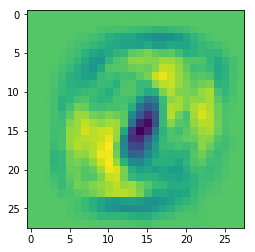


The confusion matrix of binary classifier for the class 0 is shown below:
predicted  -1.0   0.0
Actual               
-1         8957    63
 1           25   955
The weights for class 1 represented as 28 X 28 image is as shown below:


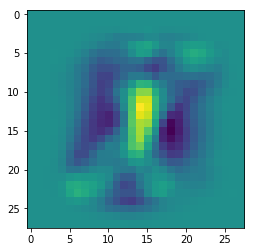


The confusion matrix of binary classifier for the class 1 is shown below:
predicted  -1.0   1.0
Actual               
-1         8832    33
 1           38  1097
The weights for class 2 represented as 28 X 28 image is as shown below:


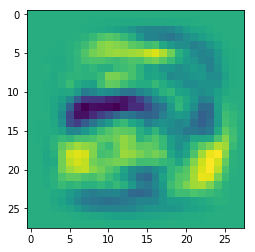


The confusion matrix of binary classifier for the class 2 is shown below:
predicted  -1.0   2.0
Actual               
-1         8889    79
 1          138   894
The weights for class 3 represented as 28 X 28 image is as shown below:


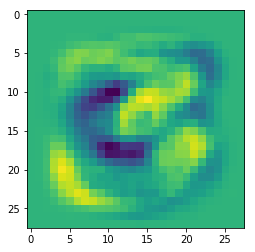


The confusion matrix of binary classifier for the class 3 is shown below:
predicted  -1.0   3.0
Actual               
-1         8895    95
 1          161   849
The weights for class 4 represented as 28 X 28 image is as shown below:


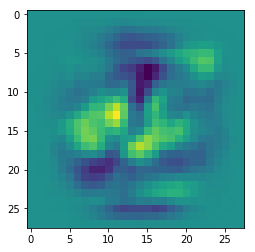


The confusion matrix of binary classifier for the class 4 is shown below:
predicted  -1.0   4.0
Actual               
-1         8904   114
 1           90   892
The weights for class 5 represented as 28 X 28 image is as shown below:


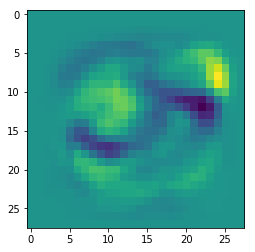


The confusion matrix of binary classifier for the class 5 is shown below:
predicted  -1.0   5.0
Actual               
-1         8468   640
 1           79   813
The weights for class 6 represented as 28 X 28 image is as shown below:


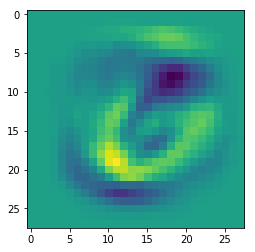


The confusion matrix of binary classifier for the class 6 is shown below:
predicted  -1.0   6.0
Actual               
-1         8956    86
 1          110   848
The weights for class 7 represented as 28 X 28 image is as shown below:


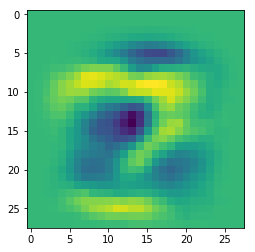


The confusion matrix of binary classifier for the class 7 is shown below:
predicted  -1.0   7.0
Actual               
-1         8871   101
 1          121   907
The weights for class 8 represented as 28 X 28 image is as shown below:


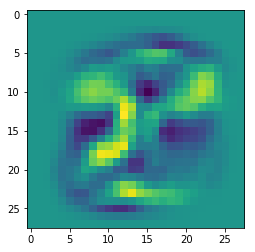


The confusion matrix of binary classifier for the class 8 is shown below:
predicted  -1.0   8.0
Actual               
-1         8692   334
 1          288   686
The weights for class 9 represented as 28 X 28 image is as shown below:


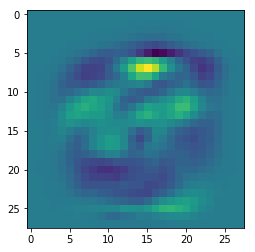


The confusion matrix of binary classifier for the class 9 is shown below:
predicted  -1.0   9.0
Actual               
-1         8357   634
 1          100   909

The overall accuracy of the classifier is:
86.22999999999999

The confusion matrix of the classifier:

col_0  0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
row_0                                                   
0      970     0    0    1    0    4    4    1    0    0
1       25  1097    2    1    0    4    3    0    2    1
2       87     7  880    5    7    2    3   11   25    5
3       85     1   15  834    1   52    2    5    7    8
4       38     1    3    3  889    1    6    1    9   31
5       48     5    5   27   14  770    7    0   11    5
6       83     3   15    0   22   62  770    0    3    0
7       62     5   24   14   11   13    1  871    3   24
8      224     4    5    8    9  140    2    5  569    8
9       70     7    2    8   40   45    0   47    5  785

The accuracy of each digit is as shown below:
  

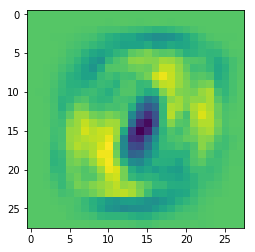


The confusion matrix of binary classifier for the class 0 is shown below:
predicted  -1.0   0.0
Actual               
-1         8958    62
 1           25   955
The weights for class 1 represented as 28 X 28 image is as shown below:


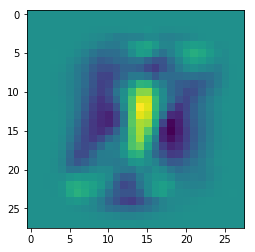


The confusion matrix of binary classifier for the class 1 is shown below:
predicted  -1.0   1.0
Actual               
-1         8832    33
 1           38  1097
The weights for class 2 represented as 28 X 28 image is as shown below:


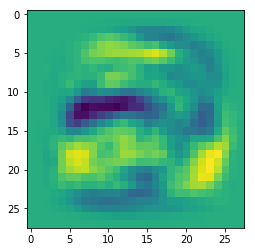


The confusion matrix of binary classifier for the class 2 is shown below:
predicted  -1.0   2.0
Actual               
-1         8885    83
 1          136   896
The weights for class 3 represented as 28 X 28 image is as shown below:


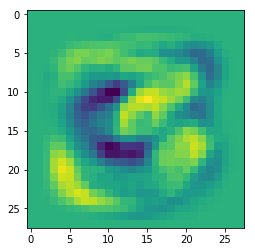


The confusion matrix of binary classifier for the class 3 is shown below:
predicted  -1.0   3.0
Actual               
-1         8732   258
 1           99   911
The weights for class 4 represented as 28 X 28 image is as shown below:


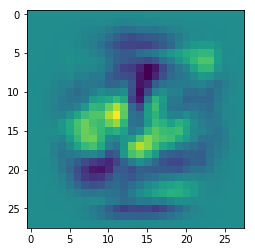


The confusion matrix of binary classifier for the class 4 is shown below:
predicted  -1.0   4.0
Actual               
-1         8899   119
 1           86   896
The weights for class 5 represented as 28 X 28 image is as shown below:


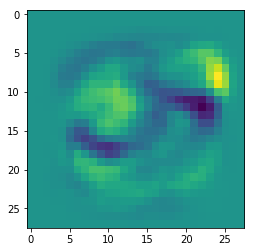


The confusion matrix of binary classifier for the class 5 is shown below:
predicted  -1.0   5.0
Actual               
-1         8475   633
 1           81   811
The weights for class 6 represented as 28 X 28 image is as shown below:


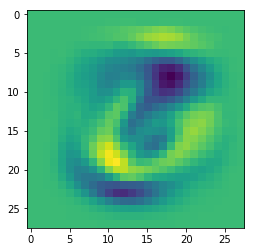


The confusion matrix of binary classifier for the class 6 is shown below:
predicted  -1.0   6.0
Actual               
-1         9041     1
 1          936    22
The weights for class 7 represented as 28 X 28 image is as shown below:


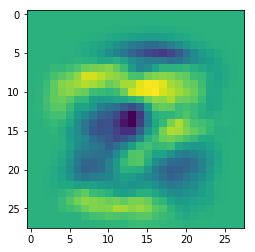


The confusion matrix of binary classifier for the class 7 is shown below:
predicted  -1.0   7.0
Actual               
-1         8876    96
 1          101   927
The weights for class 8 represented as 28 X 28 image is as shown below:


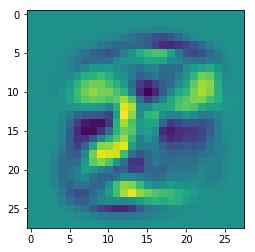


The confusion matrix of binary classifier for the class 8 is shown below:
predicted  -1.0   8.0
Actual               
-1         8284   742
 1          150   824
The weights for class 9 represented as 28 X 28 image is as shown below:


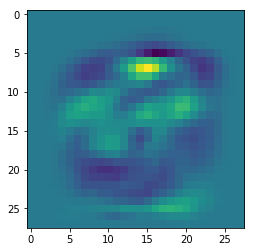


The confusion matrix of binary classifier for the class 9 is shown below:
predicted  -1.0   9.0
Actual               
-1         8146   845
 1           72   937

The overall accuracy of the classifier is:
68.56

The confusion matrix of the classifier:

col_0  0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
row_0                                                   
0      974     0    0    1    0    4    0    1    0    0
1       20  1097    2    2    0    4    0    0    9    1
2       71     7  882   10    6    1    0   14   34    7
3       50     1   16  892    0   28    0    7   12    4
4       36     1    3    7  889    1    0    1   14   30
5       50     5    5   61   13  738    0    0   17    3
6      798     3   16    1   23   63   21    0   31    2
7       36     5   26   46   11   13    0  864    4   23
8      104     4    6   19   10  139    0    5  676   11
9       47     7    2   15   44   40    0   27   45  782

The accuracy of each digit is as shown below:
   Digit    Ac

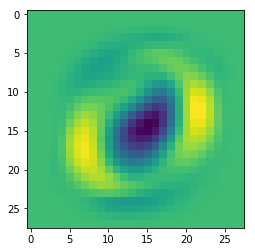


The confusion matrix of binary classifier for the class 0 is shown below:
predicted  -1.0   0.0
Actual               
-1         8909   111
 1          135   845
The weights for class 1 represented as 28 X 28 image is as shown below:


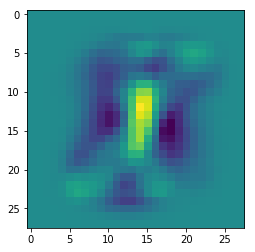


The confusion matrix of binary classifier for the class 1 is shown below:
predicted  -1.0   1.0
Actual               
-1         8833    32
 1           43  1092
The weights for class 2 represented as 28 X 28 image is as shown below:


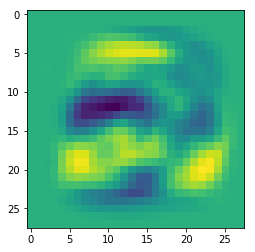


The confusion matrix of binary classifier for the class 2 is shown below:
predicted  -1.0   2.0
Actual               
-1         8887    81
 1          167   865
The weights for class 3 represented as 28 X 28 image is as shown below:


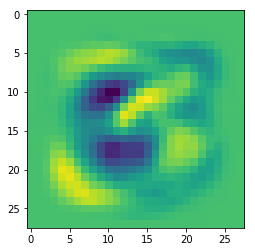


The confusion matrix of binary classifier for the class 3 is shown below:
predicted  -1.0   3.0
Actual               
-1         8990     0
 1          844   166
The weights for class 4 represented as 28 X 28 image is as shown below:


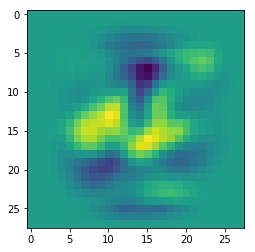


The confusion matrix of binary classifier for the class 4 is shown below:
predicted  -1.0   4.0
Actual               
-1         6883  2135
 1            6   976
The weights for class 5 represented as 28 X 28 image is as shown below:


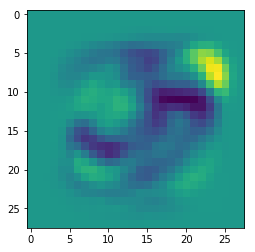


The confusion matrix of binary classifier for the class 5 is shown below:
predicted  -1.0
Actual         
-1         9108
 1          892
The weights for class 6 represented as 28 X 28 image is as shown below:


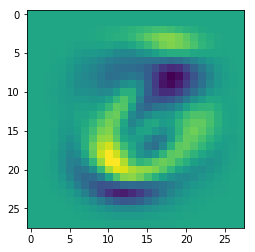


The confusion matrix of binary classifier for the class 6 is shown below:
predicted  -1.0   6.0
Actual               
-1         8913   129
 1           98   860
The weights for class 7 represented as 28 X 28 image is as shown below:


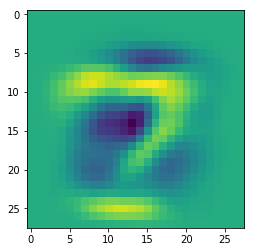


The confusion matrix of binary classifier for the class 7 is shown below:
predicted  -1.0   7.0
Actual               
-1         8862   110
 1          134   894
The weights for class 8 represented as 28 X 28 image is as shown below:


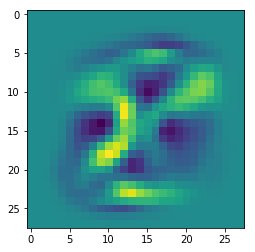


The confusion matrix of binary classifier for the class 8 is shown below:
predicted  -1.0   8.0
Actual               
-1         8086   940
 1          145   829
The weights for class 9 represented as 28 X 28 image is as shown below:


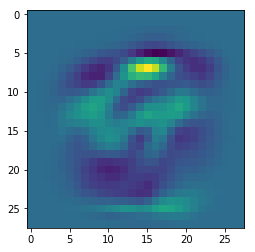


The confusion matrix of binary classifier for the class 9 is shown below:
predicted  -1.0   9.0
Actual               
-1         7801  1190
 1           71   938

The overall accuracy of the classifier is:
40.45

The confusion matrix of the classifier:

col_0  0.0   1.0  2.0  3.0  4.0  6.0  7.0  8.0  9.0
row_0                                              
0      944     0    1    0    5    8    1   21    0
1       18  1092    1    0    5    4    0   14    1
2       87     7  838    0   41    3   10   42    4
3      665     0   15  164   37    5   11   82   31
4        6     1    4    0  967    2    0    2    0
5      445     5    4    0  214    7   11  180   26
6       72     3   13    0  391  463    0   16    0
7       46     6   28    0  227    0  693    6   22
8       92     4    3    0  169    3    4  693    6
9       27     6    4    0  896    0   17   17   42

The accuracy of each digit is as shown below:
   Digit     Accuray
0      0   97.551020
1      1   99.030837
2      2   

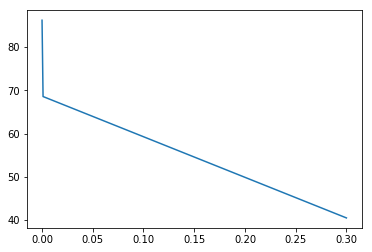

In [5]:
import matplotlib.pyplot as py
from collections import Counter
import pandas as pd

# Initialize some lambda values
lambda_list=[0,0.001,0.3]
accuracy_lambda = []

for lambda_value in lambda_list:
    print("**************** For lambda = "+str(lambda_value)+" ****************")
    total_error = 0

    # Initialize some parameters[empty lists]
    prediction_class = []
    ghl = [] 
    predicted_overall = []

    # define the columns of the dataframe to display accuracy by digits
    columns = ["Digit","Accuray"]

    # insert a column of ones as first column to calculate the bias term for training data
    images_train_wb = np.hstack((np.ones(shape=(60000,1)),images_train))
    # insert a column of ones as first column to calculate the bias term for testing data
    images_test_wb = np.hstack((np.ones(shape=(10000,1)),images_test))

    # constrct a one vs all classifier for all classes
    for i in range(10):
        # set the initial W parameter's value.
        w_new = np.zeros(shape=(785,1))
    
        # For each class make the labels referring to that class as +1 and others as -1 to replicate a binary classifier.
        labels_train_class = np.copy(labels_train)
        labels_train_class[labels_train != i] = -1
        labels_train_class[np.logical_and(labels_train == i, labels_train != -1)] = 1
        labels_train_class = labels_train_class.reshape((60000,1))
    
        # emulate the "yx" term
        B = np.multiply(labels_train_class,images_train_wb)
    
        # iterate through the to emulate the gradient descent using the formula w(t+1) = w(t) - (learning rate)*(gradient of function)
        for y in range(100):    
            Z = np.dot(B,w_new)
            A = 1 / (1 + np.exp(-Z))
            w_new -= (0.1)*(-np.dot(B.T,(1-A))+lambda_value*w_new)
        
        # display the weights obtained from gradient descent as 28 X 28 images 
        print("The weights for class "+str(i)+" represented as 28 X 28 image is as shown below:")
        py.imshow(w_new[1:].reshape(28,28))
        py.show()
        
        # For each class make the labels referring to that class as +1 and others as -1 to replicate a binary classifier for testing data
        labels_test_zero = np.copy(labels_test)
        labels_test_zero[labels_test != i] = -1
        labels_test_zero[np.logical_and(labels_test == i, labels_test != -1)] = 1
        
        # Get the prediction for test dataset and make them with correct class as +1 and others as -1
        pred = (1/(1+np.exp(-1*np.dot(images_test_wb,w_new))))
        pred[pred != 1] = -1
        pred[pred == 1] = pred[pred == 1]*i
        
        #append the predicted values into a list for later usage
        prediction_class.append(pred[:,0])
        
        # display the confusion matrix for each class for better insight into the prediction accuracy
        print("\nThe confusion matrix of binary classifier for the class "+str(i)+" is shown below:")
        actual = pd.Series(labels_test_zero, name="Actual")
        predicted = pd.Series(pred.T[0], name="predicted")
        print(pd.crosstab(actual,predicted))
        
        # calculate the total error as sum of the errors from each class
        total_error+=abs(np.sum(labels_test == i)-np.sum((1/(1+np.exp(-1*np.dot(images_test_wb,w_new))))))
        
        # append a list with a tuple of the form (digit,accuracy)
        ghl.append((i,abs(np.sum(labels_test == i)-abs(np.sum(labels_test == i)-np.sum((1/(1+np.exp(-1*np.dot(images_test_wb,w_new)))))))/np.sum(labels_test == i)*100))
    
    # Get the prediction of all classes 
    l = np.array(prediction_class).T
    
    # The overall accuracy is caculated using the formula, accuracy = (total number of actual values)-(number of wrongly predicted values)/(total number of actual values)
    print("\nThe overall accuracy of the classifier is:")
    overall_accuracy = ((len(images_test)-total_error)/len(images_test))*100
    print(overall_accuracy)
    
    # append a list with overall acuracy value for a given lambda value
    accuracy_lambda.append(overall_accuracy)
    
    # use the predictions from all the 10 classifiers to and using maximum probability or voting system to deterine the correct class. 
    for each in range(len(images_test_wb)):
        if np.all(l[each] == -1):
            predicted_overall.append(0.0)
        else:
            predicted_overall.append(Counter(l[each][l[each] != -1]).most_common(1)[0][0])
    
    # display confusion matrix for the entire classifier.
    print("\nThe confusion matrix of the classifier:\n")    
    print(pd.crosstab(labels_test,np.array(predicted_overall).T))
    
    # display the accuracy for each digit
    print("\nThe accuracy of each digit is as shown below:")
    df = pd.DataFrame(ghl, columns=columns)
    print(df)

# plot lambda vs accuracy 
py.plot(lambda_list,accuracy_lambda)
py.show()

As we can see from the below plot, The accuracy of the classifier is decreasing with more regularization. Here we have used lambda values of 0,0.001,0.5 and for lambda=0 (non-regularized) we see better accuracy. This clearly implies that there is no overfitting of the model and by regularizing we are adding extra unnecessary bias which is resulting in lesser accuracy for higher values of lambda.

C:\Users\sriha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


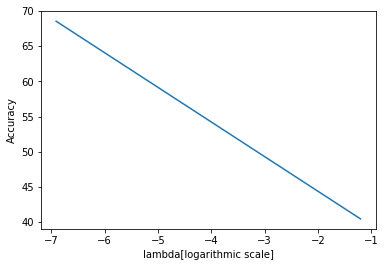

In [6]:
# plot lambda vs accuracy 
py.plot(np.log(np.array(lambda_list)),accuracy_lambda)
py.xlabel("lambda[logarithmic scale]")
py.ylabel("Accuracy")
py.show()